In [ ]:
import nltk
from nltk.corpus import genesis, stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.util import ngrams
from nltk.stem.util import suffix_replace
import string

In [ ]:
nltk.download('genesis')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Load the Genesis corpus
genesis_text = genesis.raw('english-web.txt')

In [ ]:
def text_lowercase(text):
    return text.lower()

In [ ]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [ ]:
def remove_whitespaces(text):
    return " ".join(text.split())

In [ ]:
def count_words(text):
    words = word_tokenize(text)
    return len(words)

In [ ]:
def analyze_text(text):
    words = word_tokenize(text)
    sentences = sent_tokenize(text)
    return words, sentences

In [ ]:
def print_stopwords():
    english_stopwords = set(stopwords.words('english'))
    print("List of English Stopwords:")
    print(english_stopwords)

In [ ]:
import zlib

def preprocess_text(text, stemming=False):
    # Tokenize the text
    tokens = word_tokenize(text_lowercase(text))

    # Print Tokens
    print("\n Tokens:")
    print(tokens)

    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # Print Tokens after Punctuation Removal
    print("\n Tokens after Punctuation Removal:")
    print(tokens)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Print Tokens after Stop Word Removal
    print("\n Tokens after Stop Word Removal:")
    print(tokens)

    # Lemmatization using WordNet Lemmatizer
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Print Tokens after Lemmatization
    print("\n Tokens after Lemmatization:")
    print(tokens)

    if stemming:
        # Apply stemming using different stemmers
        stemmers = [PorterStemmer(), LancasterStemmer(), SnowballStemmer("english")]
        for stemmer in stemmers:
            stemmed_tokens = [stemmer.stem(token) for token in tokens]

            # Print Tokens after Stemming
            print(f"\n Tokens after {stemmer.__class__.__name__} Stemming:")
            print(stemmed_tokens)

    # Convert tokens to a string for compression
    compressed_text = ' '.join(tokens)

    # Compress the text
    compressed_data = zlib.compress(compressed_text.encode('utf-8'))

    # Calculate compression ratio
    compression_ratio = len(compressed_text) / len(compressed_data)

    print("\n Compressed Size:", len(compressed_data))
    print("\n Compression Ratio:", compression_ratio)

    return tokens

In [ ]:
chapter_words = genesis.words('english-web.txt')
chapter_text = ' '.join(chapter_words)
cleaned_text1 = remove_punctuation(chapter_text)
cleaned_text2 = remove_whitespaces(cleaned_text1)
cleaned_text = text_lowercase(cleaned_text2)

In [ ]:
print("Processed Text:")
print(cleaned_text)

Processed Text:
in the beginning god created the heavens and the earth now the earth was formless and empty darkness was on the surface of the deep god s spirit was hovering over the surface of the waters god said let there be light and there was light god saw the light and saw that it was good god divided the light from the darkness god called the light day and the darkness he called night there was evening and there was morning one day god said let there be an expanse in the middle of the waters and let it divide the waters from the waters god made the expanse and divided the waters which were under the expanse from the waters which were above the expanse and it was so god called the expanse sky there was evening and there was morning a second day god said let the waters under the sky be gathered together to one place and let the dry land appear and it was so god called the dry land earth and the gathering together of the waters he called seas god saw that it was good god said let th

In [ ]:
word_count = count_words(cleaned_text)
print("Number of words in the processed text:", word_count)

Number of words in the processed text: 36486


In [ ]:
processed_words, processed_sentences = analyze_text(cleaned_text)
print("Number of words in the processed text:", len(processed_words))
print("Number of sentences in the processed text:", len(processed_sentences))

Number of words in the processed text: 36486
Number of sentences in the processed text: 1


In [ ]:
print_stopwords()

List of English Stopwords:
{'its', 'below', 'just', 'because', 'or', 'down', 'most', 'him', 'don', 'nor', 've', 'as', 'ourselves', 'm', "you'd", 'at', 'with', 'be', 'same', 'any', 'these', 'until', 'doesn', "wasn't", 'yourself', 'how', "wouldn't", 'on', 'out', 'is', 'mustn', 'am', 'yourselves', 'but', "haven't", 'our', 'before', 'and', 'in', 'why', "aren't", 'couldn', 'weren', 'being', 're', 'few', 'under', 'from', 'having', "couldn't", "shouldn't", 'of', 'after', "doesn't", 'into', 'o', 'now', 'them', 'whom', 'were', 's', 'during', 'to', 'can', 'we', 'too', 'between', 'hadn', 'such', 'won', 'themselves', 'haven', 'their', 'they', 'ain', 'all', "you've", 'when', 'other', 'd', 'i', 'his', 'wasn', "it's", 'does', 'ours', 'so', 'the', 'who', 'very', 'what', 'this', 'has', 'are', 'will', 'y', 'further', 'didn', 'about', 'if', "shan't", 'hers', 'wouldn', 'shouldn', 'll', 'above', 'isn', 'he', 'did', 'do', "you'll", 'shan', 'through', 'was', 'over', "you're", 'aren', 'again', 'by', 'more', "

In [ ]:
news_article = """
In a groundbreaking discovery, scientists have identified a new species of marine life deep within the ocean trenches.
The creature, named "Abyssal Wonder," exhibits unique bioluminescence and adaptations to extreme pressure conditions.
Researchers believe this finding may unlock valuable insights into the mysteries of deep-sea ecosystems.

In other news, advancements in artificial intelligence are reshaping industries worldwide.
Companies are increasingly adopting AI technologies for enhanced efficiency and decision-making.
Experts predict a significant impact on various sectors, from healthcare to finance, as AI continues to evolve and revolutionize the way we work.

The latest developments in space exploration reveal plans for a manned mission to Mars within the next decade.
Space agencies collaborate on ambitious projects to explore the red planet and search for signs of extraterrestrial life.
The mission represents a giant leap forward in humanity's quest to explore the vastness of the cosmos.

On the technology front, the release of the highly anticipated Quantum Computing Platform has sparked excitement in the scientific community.
Quantum computers promise unprecedented processing power, potentially solving complex problems that were once deemed unsolvable.
The future implications of this technology are vast and could reshape our understanding of computation.

These are just a few highlights from the dynamic world of science, technology, and exploration.
Stay tuned for more updates on the latest breakthroughs and discoveries that shape our rapidly evolving future.
"""
news_tokens = preprocess_text(news_article)


 Tokens:
['in', 'a', 'groundbreaking', 'discovery', ',', 'scientists', 'have', 'identified', 'a', 'new', 'species', 'of', 'marine', 'life', 'deep', 'within', 'the', 'ocean', 'trenches', '.', 'the', 'creature', ',', 'named', '``', 'abyssal', 'wonder', ',', "''", 'exhibits', 'unique', 'bioluminescence', 'and', 'adaptations', 'to', 'extreme', 'pressure', 'conditions', '.', 'researchers', 'believe', 'this', 'finding', 'may', 'unlock', 'valuable', 'insights', 'into', 'the', 'mysteries', 'of', 'deep-sea', 'ecosystems', '.', 'in', 'other', 'news', ',', 'advancements', 'in', 'artificial', 'intelligence', 'are', 'reshaping', 'industries', 'worldwide', '.', 'companies', 'are', 'increasingly', 'adopting', 'ai', 'technologies', 'for', 'enhanced', 'efficiency', 'and', 'decision-making', '.', 'experts', 'predict', 'a', 'significant', 'impact', 'on', 'various', 'sectors', ',', 'from', 'healthcare', 'to', 'finance', ',', 'as', 'ai', 'continues', 'to', 'evolve', 'and', 'revolutionize', 'the', 'way', '

In [ ]:
print("Processed Tokens:")
processed_tokens = preprocess_text(cleaned_text2, stemming=True)

Processed Tokens:

 Tokens:
['in', 'the', 'beginning', 'god', 'created', 'the', 'heavens', 'and', 'the', 'earth', 'now', 'the', 'earth', 'was', 'formless', 'and', 'empty', 'darkness', 'was', 'on', 'the', 'surface', 'of', 'the', 'deep', 'god', 's', 'spirit', 'was', 'hovering', 'over', 'the', 'surface', 'of', 'the', 'waters', 'god', 'said', 'let', 'there', 'be', 'light', 'and', 'there', 'was', 'light', 'god', 'saw', 'the', 'light', 'and', 'saw', 'that', 'it', 'was', 'good', 'god', 'divided', 'the', 'light', 'from', 'the', 'darkness', 'god', 'called', 'the', 'light', 'day', 'and', 'the', 'darkness', 'he', 'called', 'night', 'there', 'was', 'evening', 'and', 'there', 'was', 'morning', 'one', 'day', 'god', 'said', 'let', 'there', 'be', 'an', 'expanse', 'in', 'the', 'middle', 'of', 'the', 'waters', 'and', 'let', 'it', 'divide', 'the', 'waters', 'from', 'the', 'waters', 'god', 'made', 'the', 'expanse', 'and', 'divided', 'the', 'waters', 'which', 'were', 'under', 'the', 'expanse', 'from', 'the

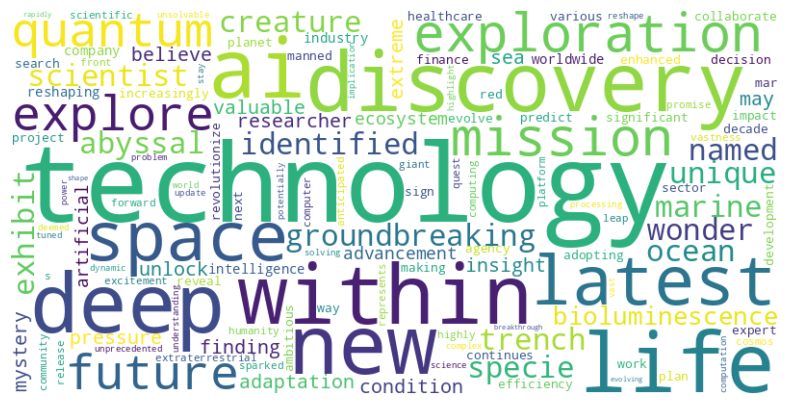

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import zlib

def preprocess_text(text, stemming=False):
    # Tokenize the text
    tokens = word_tokenize(text_lowercase(text))

    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization using WordNet Lemmatizer
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    if stemming:
        # Apply stemming using different stemmers
        stemmers = [PorterStemmer(), LancasterStemmer(), SnowballStemmer("english")]
        for stemmer in stemmers:
            tokens = [stemmer.stem(token) for token in tokens]

    # Convert tokens to a string
    processed_text = ' '.join(tokens)

    return processed_text

# Example usage
news_article = """
In a groundbreaking discovery, scientists have identified a new species of marine life deep within the ocean trenches.
The creature, named "Abyssal Wonder," exhibits unique bioluminescence and adaptations to extreme pressure conditions.
Researchers believe this finding may unlock valuable insights into the mysteries of deep-sea ecosystems.

In other news, advancements in artificial intelligence are reshaping industries worldwide.
Companies are increasingly adopting AI technologies for enhanced efficiency and decision-making.
Experts predict a significant impact on various sectors, from healthcare to finance, as AI continues to evolve and revolutionize the way we work.

The latest developments in space exploration reveal plans for a manned mission to Mars within the next decade.
Space agencies collaborate on ambitious projects to explore the red planet and search for signs of extraterrestrial life.
The mission represents a giant leap forward in humanity's quest to explore the vastness of the cosmos.

On the technology front, the release of the highly anticipated Quantum Computing Platform has sparked excitement in the scientific community.
Quantum computers promise unprecedented processing power, potentially solving complex problems that were once deemed unsolvable.
The future implications of this technology are vast and could reshape our understanding of computation.

These are just a few highlights from the dynamic world of science, technology, and exploration.
Stay tuned for more updates on the latest breakthroughs and discoveries that shape our rapidly evolving future.
"""

# Preprocess the text after removing stopwords
processed_text = preprocess_text(news_article)

# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

# Display the generated WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
